    Author: Mikael Koli
    email: koli.mikael@gmail.com
    State: In Development

# EcoSys Market Matcher Demo

This is a short demo for the StockMatcher.

## Navigation:
* [Setup](#Setup)
  * [Imports](#H0_imports)
    * [Built-in Imports](#H0_builtin)
    * [Custom Imports](#H0_custom)
    * [Third party imports](#H0_third)
  * [Versions](#H0_versions)
  * [Settings](#H0_settings)
* [Market Matching Demonstration](#H1)
    * [Demonstration of Single Orders](#H0H)
        * [Two orders](#H01)
        * [Multiple Orders](#H02)
        * [Multiple Order Types](#H03)
    * [Simulated Orders](#H1H)
        * [Generate Random Orders](#H10)
        * [Simulate Trading and Visualize Order Book](#H11)
        * [Animated Orders](#H12)
        * [Market Information](#H13)

### Imports<a class="anchor" id="H0_imports"></a>

In [1]:
import time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("..")
import ecosys

### Versions<a class="anchor" id="H0_versions"></a>

In [4]:

# Third Party
from pandas import __version__ as pandas_version
from numpy import __version__ as numpy_version
from matplotlib import __version__ as matplotlib_version
from seaborn import __version__ as seaborn_version
from scipy import __version__ as scipy_version

print('---------Third Party---------')
print(f'Pandas version:        {pandas_version}');     del pandas_version
print(f'Numpy version:         {numpy_version}');      del numpy_version
print(f'Scipy version:         {scipy_version}');      del scipy_version
print(f'Matplotlib version:    {matplotlib_version}'); del matplotlib_version
print(f'Seaborn version:       {seaborn_version}');    del seaborn_version


---------Third Party---------
Pandas version:        0.24.2
Numpy version:         1.14.2
Scipy version:         1.1.0
Matplotlib version:    3.0.0
Seaborn version:       0.9.0


### Settings<a class="anchor" id="H0_settings"></a>

In [5]:
# Warning supressing
import warnings
warnings.filterwarnings('ignore')

# Matplotlib settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Pandas settings
pd.set_option(
    "display.max_rows", 60,
    "display.max_columns", 20,
    "display.max_colwidth", 30,
    "precision", 5,
    "expand_frame_repr", False,
    "display.date_dayfirst", False
)

<br>

# Market Matching Demonstration<a class="anchor" id="H1"></a>

## Demonstration of Single Orders<a class="anchor" id="H0H"></a>

### Two orders

In [6]:
my_market = ecosys.trading_platform.StockMatcher("Nokia")
my_market.place_bid(order_type="limit", party="Investor A", price=4.99, quantity=200)
my_market.place_ask(order_type="limit", party="Investor B", price=5.01, quantity=200)

# Clear should do nothing as the orders cannot be filled
my_market.clear()

print("Orders in the Market")
print(my_market.to_frame())
print("\nTrades")
print(my_market.historical)

Orders in the Market
                  party  price  quantity
limit bid 0  Investor A   4.99       200
      ask 0  Investor B   5.01       200

Trades
Empty DataFrame
Columns: []
Index: []


In [7]:
my_market = ecosys.trading_platform.StockMatcher("Nokia")
my_market.place_bid(order_type="limit", party="Investor A", price=5.01, quantity=200)
my_market.place_ask(order_type="limit", party="Investor B", price=4.99, quantity=200)

# Clear should do nothing as the orders cannot be filled
my_market.clear()
print("Orders in the Market")
print(my_market.to_frame())
print("\nTrades")
print(my_market.historical)

Orders in the Market
Empty DataFrame
Columns: [party, price, quantity]
Index: []

Trades
                             ask                            bid  price  quantity
0  {'party': 'Investor B', 'p...  {'party': 'Investor A', 'p...    5.0       200


## Multiple Orders

In [8]:
my_market = ecosys.trading_platform.StockMatcher("Nokia")
my_market.place_bid(order_type="limit", party="Investor A", price=4.95, quantity=900)
my_market.place_ask(order_type="limit", party="Investor B", price=5.05, quantity=900)
my_market.place_bid(order_type="limit", party="Investor C", price=4.99, quantity=300)
my_market.place_ask(order_type="limit", party="Investor D", price=5.01, quantity=900)
my_market.place_bid(order_type="limit", party="Investor E", price=5.02, quantity=100)
my_market.place_ask(order_type="limit", party="Investor A", price=4.98, quantity=200)

# Clear should do nothing as the orders cannot be filled
my_market.clear()

print("Orders in the market")
print(my_market.to_frame())
print("\nTrades")
print(my_market.historical)

Orders in the market
                  party  price  quantity
limit bid 0  Investor A   4.95       900
          1  Investor C   4.99       200
      ask 0  Investor B   5.05       900
          1  Investor D   5.01       900

Trades
                             ask                            bid  price  quantity
0  {'party': 'Investor A', 'p...  {'party': 'Investor E', 'p...  5.000       100
1  {'party': 'Investor A', 'p...  {'party': 'Investor C', 'p...  4.985       100


### Multiple Order Types

In [9]:
my_market = ecosys.trading_platform.StockMatcher("Nokia")
my_market.place_bid(order_type="limit", party="Investor A", price=4.95, quantity=900)
my_market.place_ask(order_type="market", party="Investor B", quantity=900)

my_market.place_ask(order_type="limit", party="Investor D", price=5.01, quantity=900)
my_market.place_bid(order_type="limit", party="Investor E", price=5.02, quantity=100)
my_market.place_ask(order_type="limit", party="Investor A", price=4.98, quantity=200)

my_market.clear()

print(f"Last price {my_market.last_price}")
my_market.place_bid(order_type="stop", party="Investor C", price=4.96, quantity=50)
my_market.place_ask(order_type="stop", party="Investor C", price=5.05, quantity=50)
my_market.clear()


my_market.place_ask(order_type="market", party="Investor Y", quantity=100)
print("Orders in the market")
print(my_market.to_frame())
print("\nTrades")
print(my_market.historical)

Last price 4.95
Orders in the market
                   party  price  quantity
limit  bid 0  Investor A   4.95       100
       ask 0  Investor D   5.01       900
           1  Investor A   4.98       150
market ask 0  Investor Y    NaN       100
stop   ask 0  Investor C   5.05        50

Trades
                             ask                            bid  price  quantity
0  {'party': 'Investor B', 'q...  {'party': 'Investor E', 'p...   5.02       100
1  {'party': 'Investor B', 'q...  {'party': 'Investor A', 'p...   4.95       800
2  {'party': 'Investor A', 'p...  {'party': 'Investor C', 'q...   4.98        50


## Simulated Orders<a class="anchor" id="H1H"></a>

### Generate Random Orders<a class="anchor" id="H10"></a>

In [10]:
def generate_orders(n, mean_price):
    order_types = np.random.choice(["market", "limit", "stop"], p=[.05, .9, .05], size=n)
    prices = np.round(np.random.normal(loc=mean_price, scale=0.2, size=n), decimals=4)
    quantities = np.random.poisson(lam=1500, size=n)+500
    return list(zip(prices, quantities, order_types))

In [11]:
orders_buy = [list(elem) + ["bid"] for elem in generate_orders(60, 4.8)]
orders_sell = [list(elem) + ["ask"] for elem in generate_orders(30, 5.2)]
orders = orders_buy+orders_sell
np.random.shuffle(orders)

### Simulate Trading and Visualize Order Book<a class="anchor" id="H11"></a>

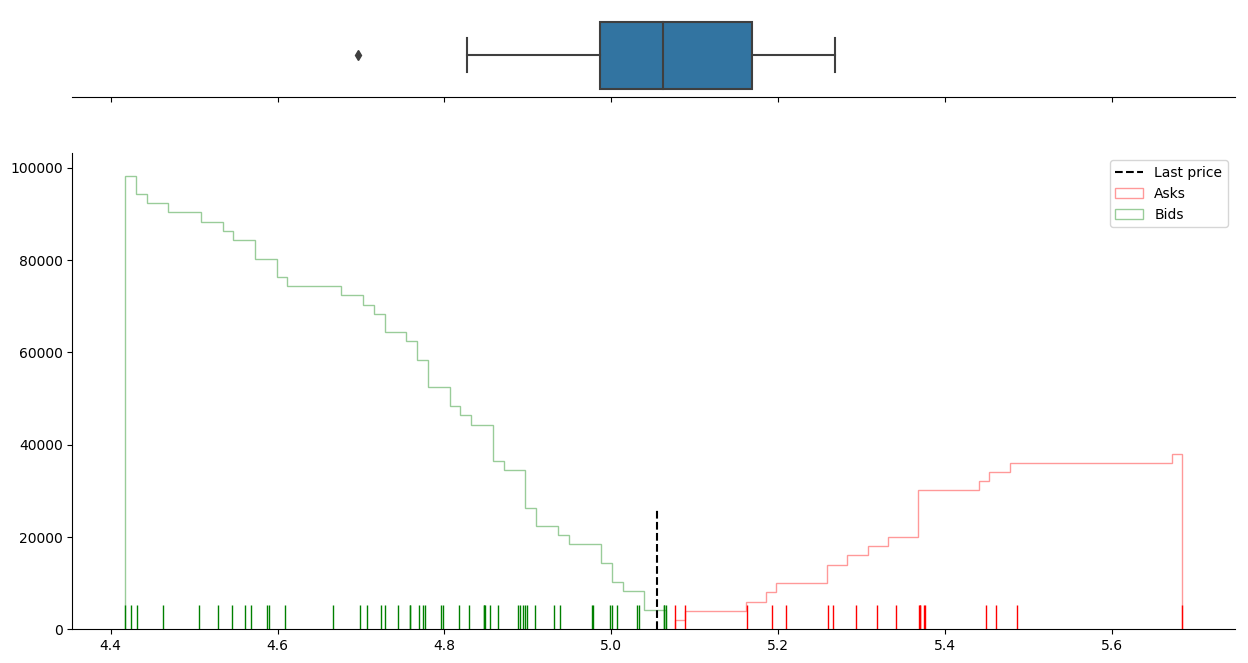

In [12]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15.0, 8.0)

my_market = ecosys.trading_platform.StockMatcher("Nokia")

for i, (p, q, order, position) in enumerate(orders):
    method = getattr(my_market, f'place_{position}')
    method(party=f'Investor {i+1}', price=p, quantity=q, order_type=order)

my_market.clear()
my_market.plot_orders()
plt.show()

- X-axis: Price
- Y-axis: Quantity

Small green and red sticks in the horizontal axis represent the price of each individual order.

### Animated Orders<a class="anchor" id="H12"></a>

When the code below is run, Matplotlib is opened in Qt window where the orders are animated "real time".

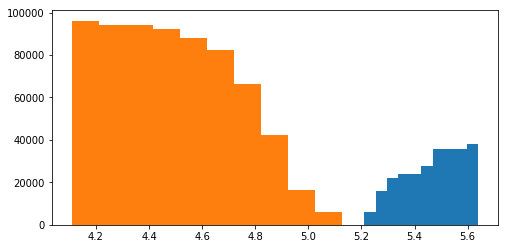

In [13]:
%matplotlib qt
my_market = ecosys.trading_platform.StockMatcher("Nokia")
orders_buy = [list(elem) + ["bid"] for elem in generate_orders(60, 4.8)]
orders_sell = [list(elem) + ["ask"] for elem in generate_orders(30, 5.2)]
orders = orders_buy+orders_sell
np.random.shuffle(orders)

for i, (p, q, order, position) in enumerate(orders):
    method = getattr(my_market, f'place_{position}')
    method(party=f'Investor {i+1}', price=p, quantity=q, order_type=order)
    if i % 5:
        my_market.plot_order_animate()

    my_market.clear()
    time.sleep(0.1)


### Market Information<a class="anchor" id="H13"></a>
This section is about showing the market information from current state.

In [14]:
%matplotlib inline

Text(0.5, 1.0, 'Bid-Ask Quantities')

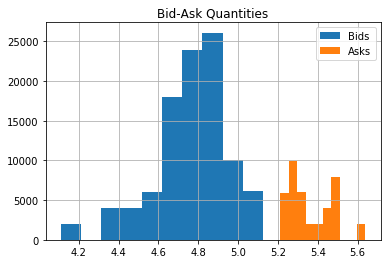

In [15]:
df_plot = my_market.to_frame()
df_plot = df_plot[df_plot.index.get_level_values(1) == "bid"]
df_plot["price"].hist(weights=df_plot["quantity"], label="Bids")

df_plot = my_market.to_frame()
df_plot = df_plot[df_plot.index.get_level_values(1) == "ask"]
df_plot["price"].hist(weights=df_plot["quantity"], label="Asks")
plt.legend()
plt.title("Bid-Ask Quantities")

© 2019 Mikael Koli